In [2]:
## MP 573 Lecture 9: Intro to Sampling
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio

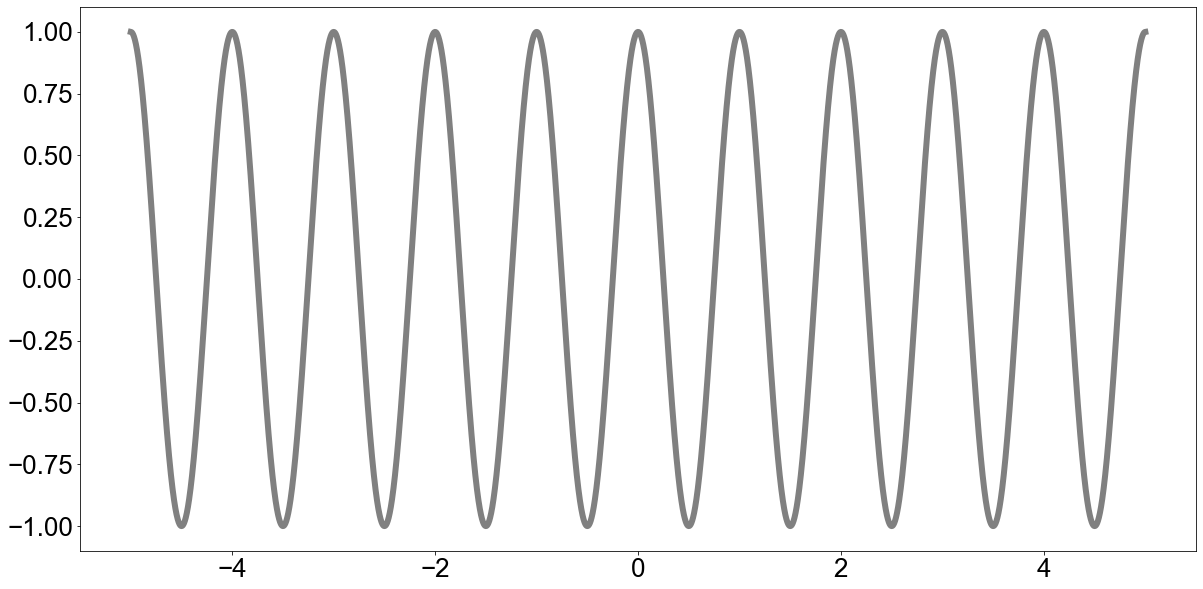

In [10]:
# Simulate some sinusoidal signal, and plot
N = 10001
xmax = 5
x = np.linspace(-xmax,xmax,N)
s = np.cos(2*np.pi*x)
plt.figure(figsize=(20,10))
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 26}
plt.rc('font', **font)
plt.plot(x,s,'gray',linewidth=6.0)

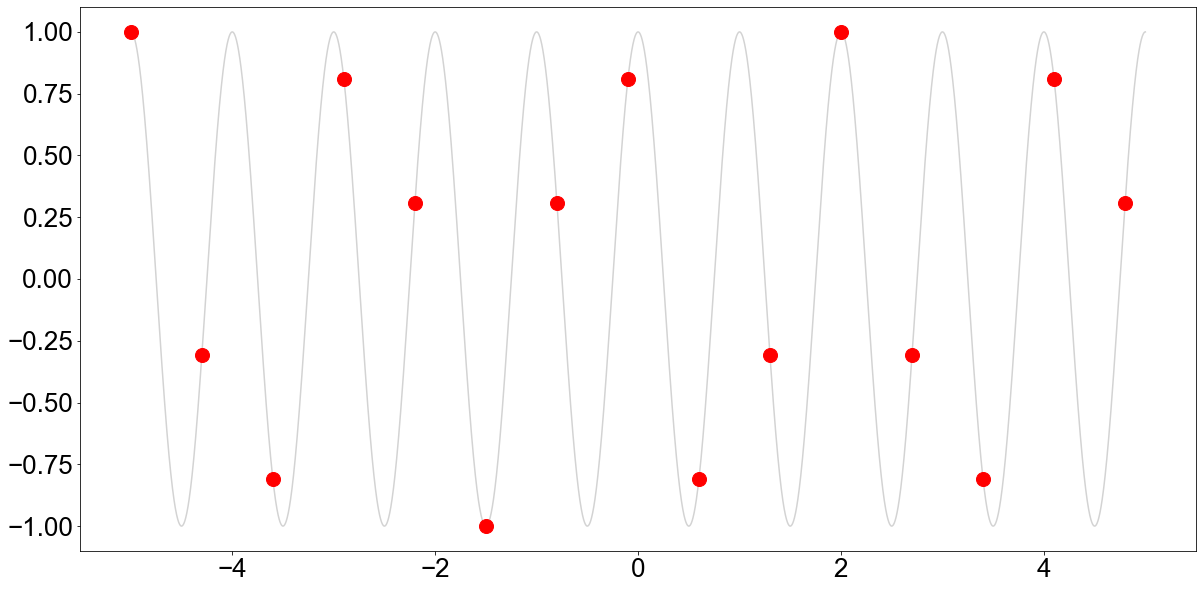

In [16]:
# Sample our signal
dx = 0.7
x2 = np.arange(-xmax,xmax,dx)
s2 = np.cos(2*np.pi*x2)
plt.figure(figsize=(20,10))
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 26}
plt.rc('font', **font)
plt.plot(x,s,'lightgray')
plt.plot(x2,s2,'ro',markersize=14)